<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON10_MEF_v2_TEFAS_TREND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:


# @title Markov Markowitz Company / Efficient Portfolio Generator
# @markdown ---
# @markdown Input parameters for portfolio

PORTFOLIO_OWNER = "FONLAR" # @param {type:"string"}
OPTIMIZATION = "MDD"  # @param ['SHARPE', 'MDD', 'MINVAR']
TREND = "DOWN" # @param ['UP', 'DOWN']
# start date is 1825 days on 20.12.2023

OFFSET = 72 # @param {type:"number"}
LOOKBACK = 91 # @param {type:"number"}
BACKTEST = 72 # @param {type:"number"}
PEAK_FINDER_DIVIDER = 12 # @param {type:"number"}
P_BOUND = 1 # @param {type:"number"}10
PURSE = 350000  # @param {type: "number"}
EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500','cryptos']
COMISSION_PERCENT = 0.0006 # @param {type: "number"}
# @markdown ---
OPEN_CLOSE_SHARPE = False # @param {type: "boolean"}
NEGATIVE_SHARPE = False # @param {type: "boolean"}
NEGATIVE_MDD = False # @param {type: "boolean"}
NEGATIVE_VAR = False # @param {type: "boolean"}
SEND_MAIL = True # @param {type: "boolean"}
SAVE_PF = True # @param {type: "boolean"}

# @markdown ---



In [29]:
def LoadFileFromGithub(src_dir,csv_file):
  user = "MarkovMarkowitz"
  repo = "MarkovMarkowitz"
  url = f"https://raw.githubusercontent.com/{user}/{repo}/{src_dir}/{csv_file}"
  !wget --no-cache --backups=1 {url}

In [30]:
# EXCHANGE_FILE = f"{EXCHANGE}_selected.csv"
# EXCHANGE_FILE

LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"FJB_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"DVT_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"GTY_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"IRT_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"IVY_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"ZFB_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"DZM_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"YAY_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"GPG_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"DBH_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"YZC_{TREND}.csv")
LoadFileFromGithub( src_dir = "MarkovMarkowitz-patch-1/FONLAR", csv_file = f"TFF_{TREND}.csv")

#"https://github.com/MarkovMarkowitz/MarkovMarkowitz/tree/main/FONLAR""


--2024-02-21 20:43:45--  https://raw.githubusercontent.com/MarkovMarkowitz/MarkovMarkowitz/MarkovMarkowitz-patch-1/FONLAR/FJB_DOWN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8616 (8.4K) [text/plain]
Failed to rename FJB_DOWN.csv to FJB_DOWN.csv.1: (2) No such file or directory
Saving to: ‘FJB_DOWN.csv’

FJB_DOWN.csv        100%[===================>]   8.41K  --.-KB/s    in 0s      

2024-02-21 20:43:45 (87.9 MB/s) - ‘FJB_DOWN.csv’ saved [8616/8616]

--2024-02-21 20:43:45--  https://raw.githubusercontent.com/MarkovMarkowitz/MarkovMarkowitz/MarkovMarkowitz-patch-1/FONLAR/DVT_DOWN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.git

In [31]:
from datetime import date
today = date.today()

def GenerateNewPortfolioFilename():
  new = f"ON2_{PORTFOLIO_OWNER}_{OPTIMIZATION}_D{today}_P{PURSE/1000}K_{EXCHANGE}_LB{LOOKBACK}_OFF{OFFSET}_PB{P_BOUND}_NEG={NEGATIVE_SHARPE}_LONG={not OPEN_CLOSE_SHARPE}.xlsx"
  return new

In [32]:
offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

print("Selected = ", offset, look_back, CURRENT_T2, exchange)

Selected =  72 91 350000 bist30


In [33]:
from datetime import date, timedelta, datetime

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

backtest_start = (date.today() - timedelta(days=offset-1)).isoformat()
backtest_end =   (date.today() - timedelta(days=offset-BACKTEST)).isoformat()


print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
BACKTEST_START_DATE = backtest_start
BACKTEST_END_DATE = backtest_end

START_DATE, END_DATE
start_time = datetime.now()


print(f"Backtest start date: ",BACKTEST_START_DATE)
print(f"Backtest end date: ",BACKTEST_END_DATE)


Current Date:  2024-02-21
163 days before current date:  2023-09-11
72 days before current date:  2023-12-12
Backtest start date:  2023-12-12
Backtest end date:  2024-02-21


In [34]:
# Installing and Importing the libraries

!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scipy
!pip3 install nsepy
!pip3 install pyfolio


import time
start_time = time.time()


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from nsepy import *

import os

from datetime import datetime
import time
import yfinance as yf



In [35]:

from pathlib import Path

def GetSelectedStockList(exchange):

    from google.colab import files

    filename = f"{exchange}_selected.csv"
    my_file = Path(f"/content/{filename}")

    if my_file.is_file():
        stock_list = pd.read_csv(filename).Ticker
    else:
        files.upload_file(filename)
        stock_list = pd.read_csv(filename).Ticker

    print(stock_list)
    return(stock_list)

# stock_list = GetSelectedStockList(exchange)

stock_list = ["FJB", "DVT", "GTY", "IRT", "IVY", "ZFB", "DZM", "YAY", "GPG", "DBH", "YZC", "TFF"]
#stock_list = ["FJB", "DVT", "GTY", "IRT", "IVY", "ZFB"]

In [36]:
def NextStep():
    global STEP
    STEP+=1
    print(70*'_')
    print(f"\nPerforming STEP-{STEP}:")

def NextChart():
    global CHART
    CHART+=1

In [37]:
# from datetime import date, timedelta



# current_date = date.today().isoformat()
# days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
# days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

# print("\nCurrent Date: ",current_date)
# print(f"{look_back+offset} days before current date: ",days_before)
# print(f"{offset} days before current date: ",days_after)

# STEP = 0
# CHART = 0
# dateStart = days_before
# START_DATE = dateStart
# END_DATE   = days_after
# START_DATE, END_DATE
# start_time = datetime.now()


In [38]:
# import csv
# with open('IRT.csv', 'r') as textfile:
#     for row in reversed(list(csv.reader(textfile))):
#         print (', '.join(row))

In [39]:




# ### Download the adjusted close prices of stocks <a name="downloads"></a>

# In[4]:

LENGTH = 64



price_list = []

print(LENGTH*"*")
print("Starting Download ...")
print(LENGTH*"*")
for tick in stock_list:
        print(f"Downloading {tick}")
        yf_tick = yf.Ticker(tick)
        #df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
        df = pd.read_csv(f"{tick}_{TREND}.csv", index_col='Tarih', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal="," )
        df = df['Fiyat']
        df.dropna(how='all', inplace=True)
        price_list.append(df)
print(LENGTH*"*")



****************************************************************
Starting Download ...
****************************************************************
****************************************************************


In [40]:
price_list

[Tarih
 2023-09-11    1.989339
 2023-09-12    1.983192
 2023-09-13    1.975712
 2023-09-14    1.974904
 2023-09-15    1.987387
                 ...   
 2023-12-05    2.226758
 2023-12-06    2.254687
 2023-12-07    2.253021
 2023-12-08    2.255376
 2023-12-11    2.279994
 Name: Fiyat, Length: 66, dtype: float64,
 Tarih
 2023-09-11    2.526297
 2023-09-12    2.517494
 2023-09-13    2.526204
 2023-09-14    2.496235
 2023-09-15    2.496910
                 ...   
 2023-12-05    3.015257
 2023-12-06    3.028034
 2023-12-07    3.029951
 2023-12-08    3.017908
 2023-12-11    3.043270
 Name: Fiyat, Length: 66, dtype: float64,
 Tarih
 2023-09-11    2.386555
 2023-09-12    2.393874
 2023-09-13    2.390783
 2023-09-14    2.390635
 2023-09-15    2.385193
                 ...   
 2023-12-05    2.721138
 2023-12-06    2.744597
 2023-12-07    2.765481
 2023-12-08    2.770135
 2023-12-11    2.754872
 Name: Fiyat, Length: 66, dtype: float64,
 Tarih
 2023-09-11    2.098636
 2023-09-12    2.088377
 2023-

In [41]:
print(LENGTH*"*")

## Save datafiles to disk

for i,df in enumerate(price_list):
        df.to_csv(f"new_{stock_list[i]}.csv")

****************************************************************


In [42]:

# In[5]:


import pandas as pd
import os
Stocks = stock_list
pf_data = pd.DataFrame()
li = pd.DataFrame() # my real portfolio dataframe for close
lu = pd.DataFrame() # my real portfolio dataframe for open
rets = pd.DataFrame()
names = []
count = len(stock_list)

In [43]:
# os.chdir(wd)
#for file in sorted2.Stock:
for file in stock_list:
    pf_data = pd.read_csv(f"new_{file}.csv", index_col='Tarih', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal="." )
    pf_data = pd.read_csv(f"new_{file}.csv", index_col='Tarih' )

    li = pd.concat( [li,pf_data['Fiyat']],axis=1) #, ignore_index=True)
    #lu = pd.concat( [lu,pf_data['Open']],axis=1) #, ignore_index=True)
    # st_name = file.split('.',maxsplit = 1)
    # names.append(st_name[0])
    names.append(file)

li.columns = names
li = li.rename_axis(index="Date")
li


,FJB,DVT,GTY,IRT,IVY,ZFB,DZM,YAY,GPG,DBH,YZC,TFF
Date,,,,,,,,,,,,
2023-09-11,1.989339,2.526297,2.386555,2.098636,1.361021,1.694555,32.973896,500.289940,5.768166,0.153598,1.224817,13.596665
2023-09-12,1.983192,2.517494,2.393874,2.088377,1.346614,1.693277,33.023024,503.538853,5.790002,0.154016,1.225214,13.649933
2023-09-13,1.975712,2.526204,2.390783,2.095502,1.363822,1.710918,33.027748,503.138563,5.798721,0.153792,1.225964,13.654708
2023-09-14,1.974904,2.496235,2.390635,2.080564,1.339918,1.689082,33.078543,501.101338,5.809632,0.153767,1.221852,13.539616
2023-09-15,1.987387,2.496910,2.385193,2.097467,1.354765,1.686103,33.084069,504.351539,5.829938,0.153714,1.225509,13.583552
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05,2.226758,3.015257,2.721138,2.473282,1.720953,2.112896,36.989201,560.948993,6.273623,0.172440,1.383670,15.090420
2023-12-06,2.254687,3.028034,2.744597,2.486450,1.702067,2.111146,37.044725,556.421048,6.186635,0.172815,1.377303,14.992734
2023-12-07,2.253021,3.029951,2.765481,2.483035,1.743272,2.120403,37.202574,564.408475,6.277369,0.173570,1.381399,15.146822


In [44]:
pf_data


,Fiyat
Tarih,
2023-09-11,13.596665
2023-09-12,13.649933
2023-09-13,13.654708
2023-09-14,13.539616
2023-09-15,13.583552
...,...
2023-12-05,15.090420
2023-12-06,14.992734
2023-12-07,15.146822


<Figure size 640x480 with 0 Axes>

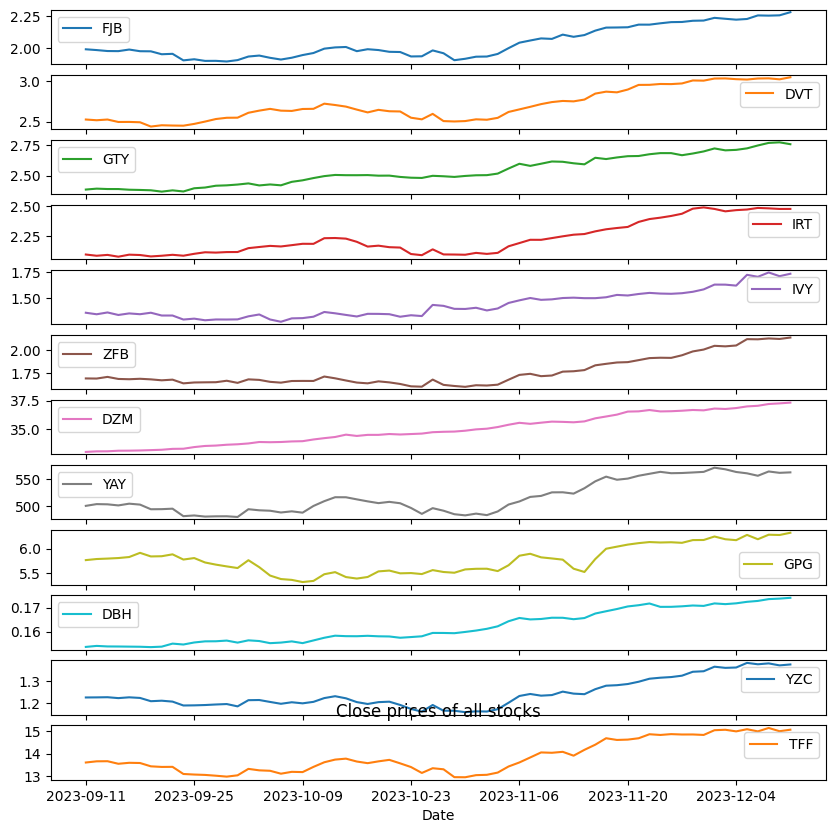

In [45]:

#pf_data_open = lu.sort_values(by=['Date'], ascending=[True])

#pf_data.to_csv(f'{exchange}.csv')
#pf_data_open.to_csv(f'{exchange}_open.csv')


plt.figure()
li.plot(subplots = True,figsize = (10,10))
plt.title("Close prices of all stocks")
plt.savefig("Fig1_ClosePrices.jpg", format='jpg', dpi=300)
plt.show()

Sharpe Ratio = 1.0326086956521738
Max Sharpe Ratio = 1.5555555555555554
Max Sharpe Ratio Return = 0.58
Max Sharpe Ratio Volatility = 0.225


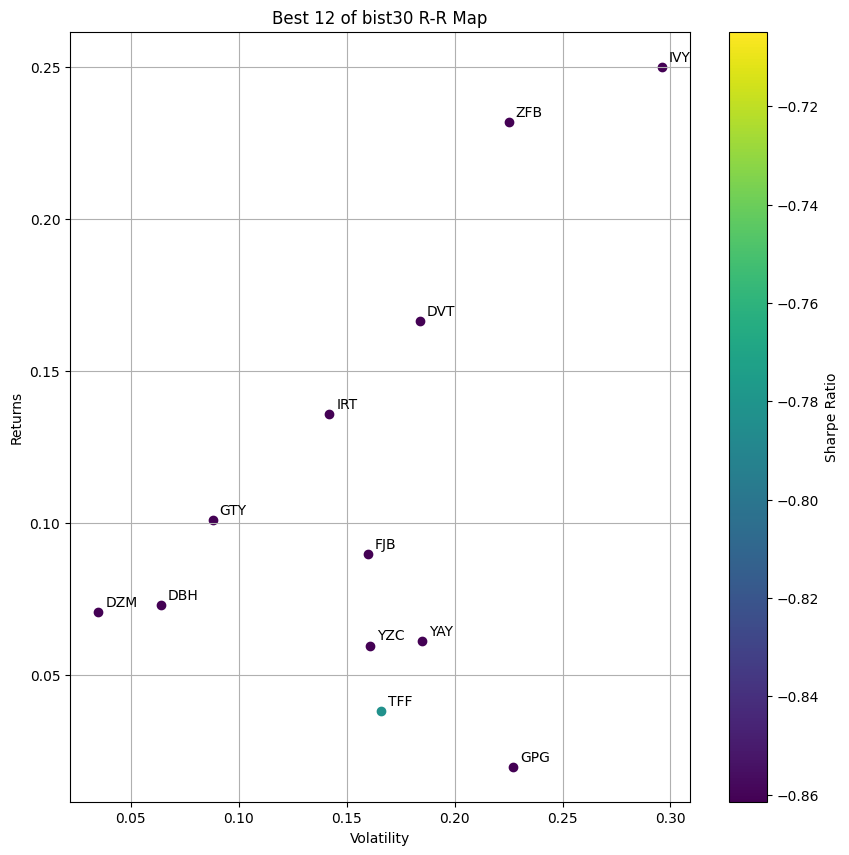

Max Sharpe Ratio = 1.5555555555555554
Max Sharpe Ratio Return = 0.58
Max Sharpe Ratio Volatility = 0.225


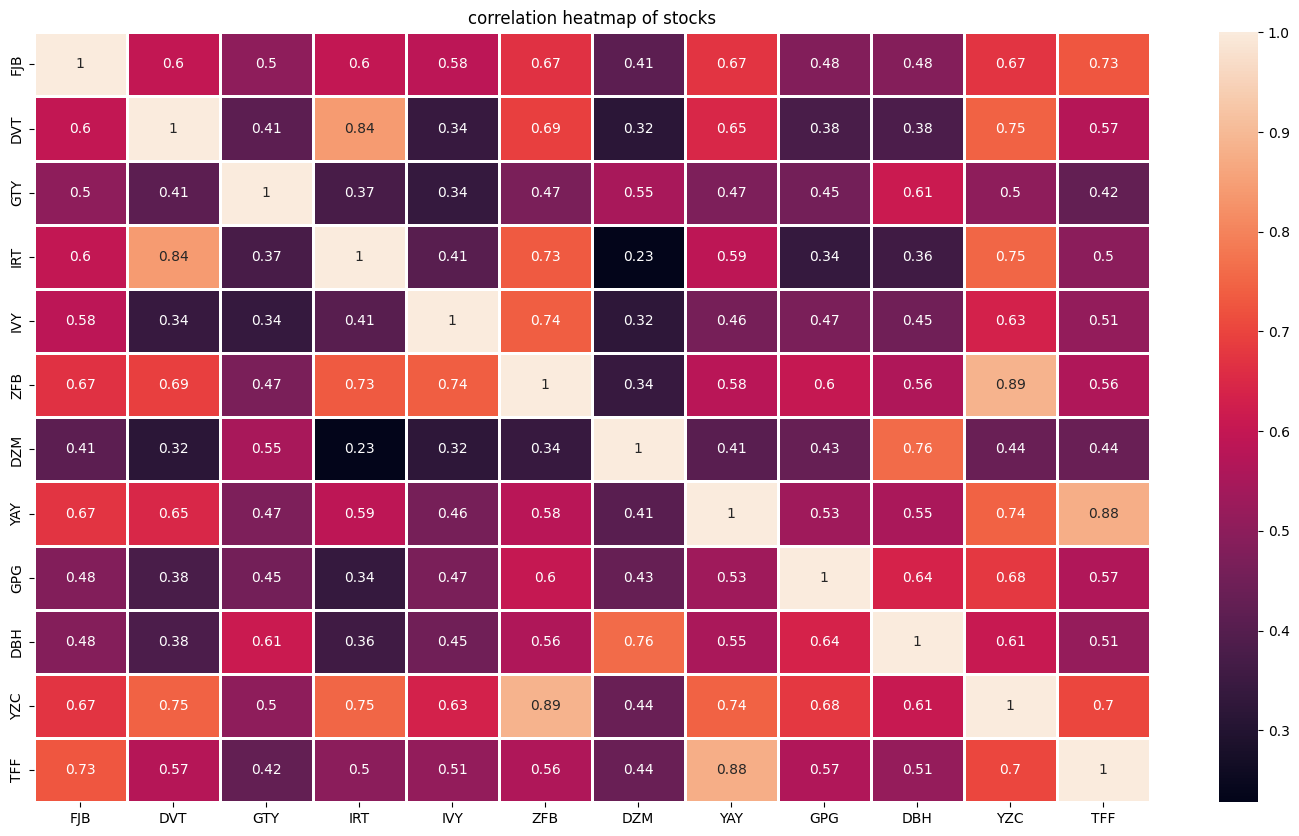

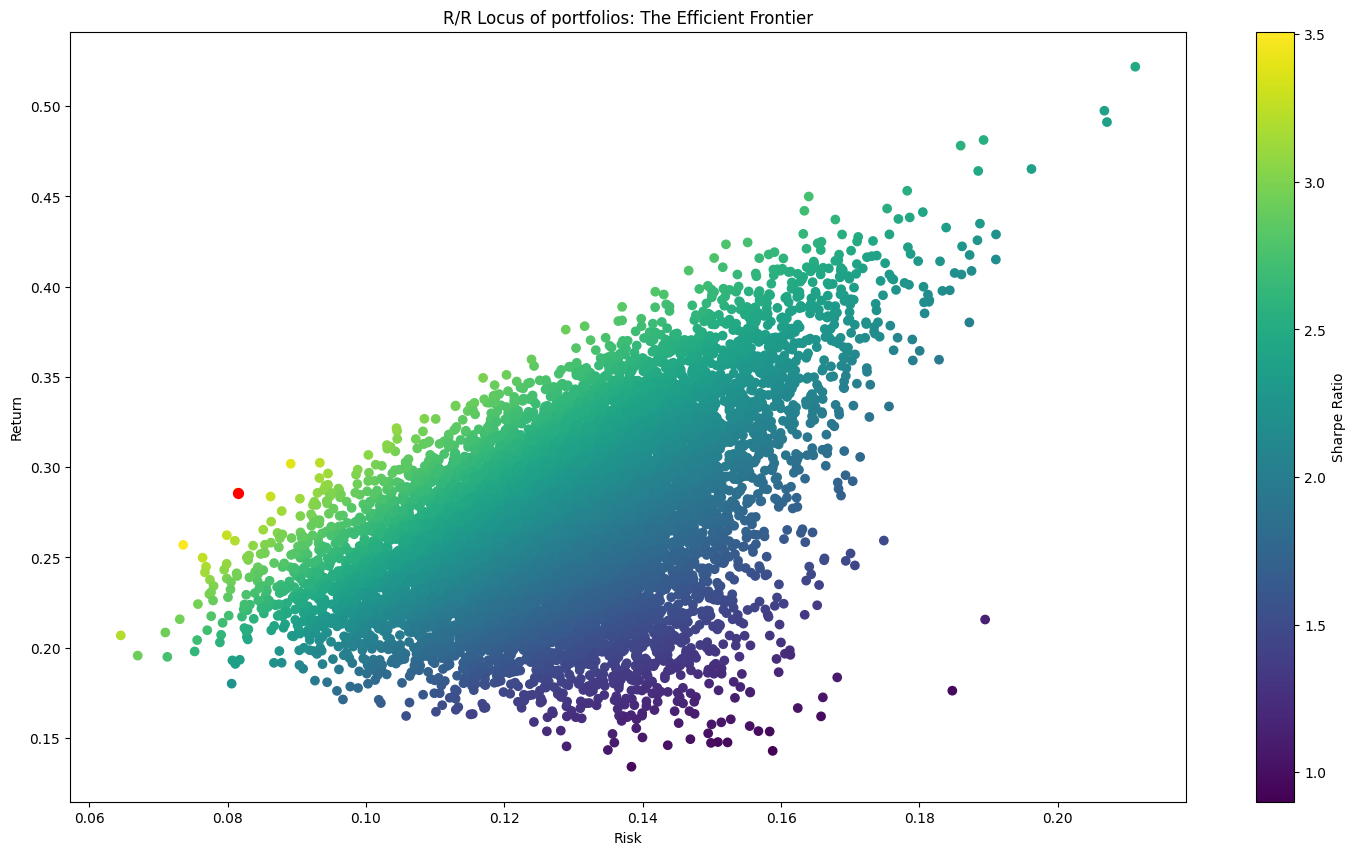

Max Sharpe Ratio = 3.509005588280857
Max Sharpe Ratio Return = 0.2859374470870638
Max Sharpe Ratio Volatility = 0.08148674600063865
[0.0351027  0.03510328 0.03510299 0.03510314 0.03510279 0.0351027
 0.0351027  0.03510298 0.03510277 0.0351027  0.03510388 0.03510305
 0.03510286 0.03510287 0.03510273 0.03510284 0.03510272 0.03510276
 0.03510272 0.0351028 ]
{'return': 0.20181448501214072, 'risk': 0.05072545748439673, 'sharpe': -0.6542181506803996, 'MDD': -0.003115641214371028}
% weights of minimum MDD PF with 12 assets
------------------------------------------------------------
         %  Amounts for Capital of 100000 TL
FJB   0.00                               0.0
DVT   0.00                               0.0
GTY  31.68                           31680.0
IRT   0.00                               0.0
IVY   0.00                               0.0
ZFB   0.00                               0.0
DZM  45.86                           45860.0
YAY   0.00                               0.0
GPG   0.00   

,FJB,DVT,GTY,IRT,IVY,ZFB,DZM,YAY,GPG,DBH,YZC,TFF,Portfolio,PF_Rets
Date,,,,,,,,,,,,,,
2023-09-11,1.989339,2.526297,2.386555,2.098636,1.361021,1.694555,32.973896,500.289940,5.768166,0.153598,1.224817,13.596665,99972.714060,NaN
2023-09-12,1.983192,2.517494,2.393874,2.088377,1.346614,1.693277,33.023024,503.538853,5.790002,0.154016,1.225214,13.649933,100199.276436,0.002266
2023-09-13,1.975712,2.526204,2.390783,2.095502,1.363822,1.710918,33.027748,503.138563,5.798721,0.153792,1.225964,13.654708,100132.058462,-0.000671
2023-09-14,1.974904,2.496235,2.390635,2.080564,1.339918,1.689082,33.078543,501.101338,5.809632,0.153767,1.221852,13.539616,100197.043335,0.000649
2023-09-15,1.987387,2.496910,2.385193,2.097467,1.354765,1.686103,33.084069,504.351539,5.829938,0.153714,1.225509,13.583552,100124.737442,-0.000722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-05,2.226758,3.015257,2.721138,2.473282,1.720953,2.112896,36.989201,560.948993,6.273623,0.172440,1.383670,15.090420,112750.414202,0.004050
2023-12-06,2.254687,3.028034,2.744597,2.486450,1.702067,2.111146,37.044725,556.421048,6.186635,0.172815,1.377303,14.992734,113193.821703,0.003933
2023-12-07,2.253021,3.029951,2.765481,2.483035,1.743272,2.120403,37.202574,564.408475,6.277369,0.173570,1.381399,15.146822,113800.845904,0.005363


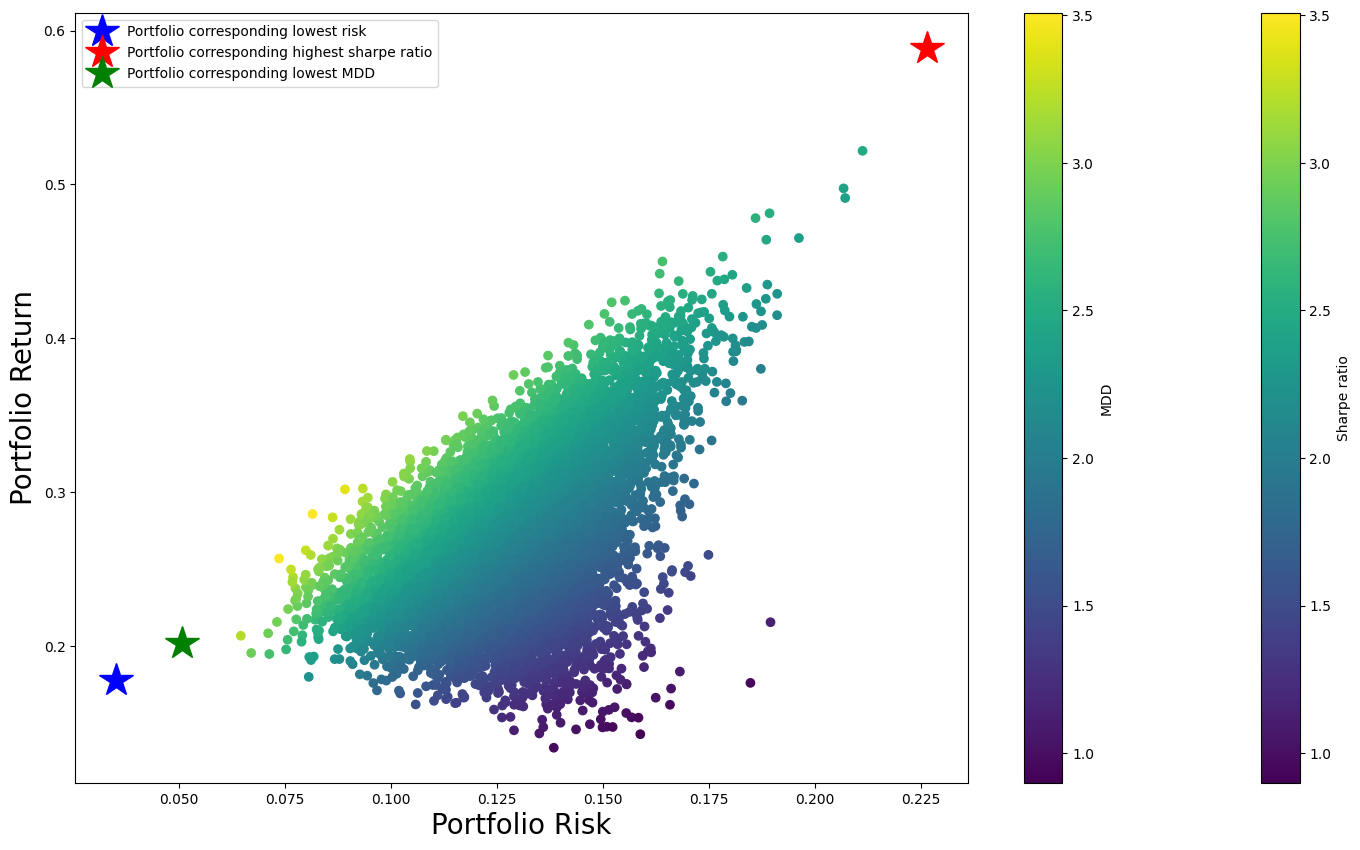

In [46]:


pf_data = li




if  OPEN_CLOSE_SHARPE:
  log_returns = np.log(pf_data_open / pf_data.shift(1)) - COMISSION_PERCENT*2
else:
  log_returns = np.log(pf_data/pf_data.shift(1)) - COMISSION_PERCENT*2


#log_returns = (data['Adj Open'] - data['Adj Close'].shift(1)) / data['Adj Close'].shift(1) - COMISSION_PERCENT*2)


log_returns

log_returns.describe()
np.round(log_returns.mean(),4)
yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
yearly_rets

vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation
vol

risk_free_rate = 0.23

sharpe = (yearly_rets - risk_free_rate)/vol
sharpe

max_sr_vol = vol[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
max_sr_ret = yearly_rets[sharpe.argmax()] # return corresponding to maximum sharpe ratio

def PrintSharpePerformance():
    yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
    yearly_rets
    vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation
    vol
    sharpe = (yearly_rets - risk_free_rate)/vol
    sharpe
    max_sr_vol = vol[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
    max_sr_ret = yearly_rets[sharpe.argmax()] # return corresponding to maximum sharpe ratio

    ASSETS = log_returns.mean().index

    print(f"Sharpe Ratio = {sharpe[1]}")
    print(f"Max Sharpe Ratio = {sharpe.max()}")
    print(f"Max Sharpe Ratio Return = {max_sr_ret}")
    print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")
    return vol, ASSETS,sharpe


def plot_with_labels(coord, labels, sharpe):
    assert len(coord) == len(labels), 'coord len is not equal to labels len'
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels): #get (0, label)
        x, y = coord[i] #2 dim
        #plt.scatter(x, y)
        # yearly_rets = np.round(log_returns.mean() * 252,2) # Mean returns annualized for year
        # vol = np.round(log_returns.std()*np.sqrt(252),3) # annualized version of std deviation

        #sharpe = (y - risk_free_rate)/x
        plt.scatter(x, y, c=sharpe[i], cmap='viridis')
        plt.annotate(label,
                xy=(x, y), #show point
                xytext=(5, 2), #show annotate
                textcoords='offset points',
                ha='left',
                va='bottom')

    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Volatility')
    plt.ylabel('Returns')
    plt.grid(True)
    plt.title(f'Best {len(log_returns.mean())} of {exchange} R-R Map')
    plt.savefig("Fig2_R-R_Map.jpg", format='jpg', dpi=300)
    plt.show()
    return "Fig2_R-R_Map.jpg"

def PlotRRMap():
    coord = list(zip(vol, log_returns.mean()*100))
    labels = ASSETS
    aa = plot_with_labels(coord, labels, sharpe)

    from IPython.display import Image
    Image(url=aa)

vol, ASSETS,sharpe = PrintSharpePerformance()

PlotRRMap()

print(f"Max Sharpe Ratio = {sharpe.max()}")
print(f"Max Sharpe Ratio Return = {max_sr_ret}")
print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")


plt.figure(figsize=(18,10))
sns.heatmap(log_returns.corr(),linecolor='white',linewidths=1,annot=True)
plt.title("correlation heatmap of stocks")
plt.savefig("Fig3_Correlation_Heatmap.jpg", format='jpg', dpi=300)
plt.show()


#sns.pairplot(log_returns,palette='coolwarm')
#plt.show()


# - The pair plots also signify the same result that there is no pair of stocks with high negative correlation. We don't find any pair-plot with upper-left to lower-right pattern.
# - The pairs with high positive correlation have scatter plot with lower-left to upper-right pattern .
# - Other pairs don't form any pattern.

# # Markowitz Model
#
#
#
#
#

#
# - We model our assets by their expected return, $E[R]$ and their risk, which is expressed as their standard deviation, $\sigma$

# - Our investment decisions are expressed by investing 100% of our wealth in assets( here, stocks), where each particular investment represents a proportion of our total wealth.

#
# - We will now implement Markowitz Model. This model assists in the selection of the most efficient portfolios by analyzing various possible portfolios of the selected stocks.

# - We invest $w_i$ in $stock_i$ for every i, such that

#  <h3>$$\Sigma^{n}_{i=1} w_i = 1$$</h3>

# - The expected return of the portfolio constructed would be

# <h3>
# $$E[R_p] = \Sigma^{n}_{i=1} w_i E[R_i]$$</h3>

# and the risk associated with the portfolio would be
#

# <h3>$$\sigma^2(R_p) = \Sigma^{n}_{i=1} w_i^2 \sigma^2(R_i) + \Sigma^{}_{i=1}\Sigma^{}_{j {\neq} i} w_i w_j \sigma(R_i) \sigma(R_j) \rho_{ij}$$</h3>

# $E[R_i]$ is the annual expected return of $i$th stock, $\sigma(R_i)$ corrsponds to annual standard deviation of $i$th stock and $\rho_{ij}$ is the correlation between the logarithmic returns $i$th and the $j$th stock.

# - $E[R_p]$ is the annual expected return of the portfolio and $\sigma(R_p)$ is the risk associated with the portfolio (Also the standard deviation of the portfolio)

# - An efficient portfolio is one that maximizes return for a given level of risk. Our task is to select adequate weights $w_i$ to get the efficient portfolio

# #### Implementation

# -  Let $W_{1 \times n}$ be a array containing the weights $w_i$ such that $\Sigma^{n}_{i=1} w_i = 1$ and $E[R]_{ n\times 1}$ be another array containing annual expected returns of n stocks present in the portfolio and $C$ be the covariance matrix of annual returns of  stocks, then

# <h3>$$E[R_p] = WE[R]$$</h3>

#
# $$ \sigma^2(R_p) = W^TCW $$

# ### Sharpe Ratio
#
# - It is a statistical measure used in Modern Portfolio Theory.
# - The Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.
# - A portfolio with a higher Sharpe ratio is considered to have best risk-adjusted returns.
#
#
#
#

# $$ S = \frac{E[R_p] - R_f}{\sigma(R_p)} $$

# Here, $R_f$ is the risk free rate of return. We have taken risk free rate as 10 year government bond rate in Turkey.

# In[22]:


# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(np.ones(size))
    return weight


# In[23]:

def calculate_MDD(historical_prices, weights):
    """
    Calculate the Maximum Drawdown (MDD) of the portfolio.

    :param historical_prices: DataFrame, historical prices of assets in the portfolio
    :param weights: array-like, weights of the assets in the portfolio
    :return: float, Maximum Drawdown of the portfolio
    """
    # Calculate daily portfolio value
    portfolio_values = (historical_prices * weights).sum(axis=1)

    # Calculate the cumulative maximum value up to each point
    cumulative_max = portfolio_values.cummax()

    # Calculate drawdowns
    drawdowns = (portfolio_values - cumulative_max) / cumulative_max

    # MDD is the maximum drawdown
    MDD = drawdowns.min()

    return MDD

risk_free_rate = 0.235 # quite high in Turkey !

# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 250
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 250, weight)))
    sharpe = (port_return - risk_free_rate)/port_risk
    MDD = calculate_MDD(pf_data, weight)

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe, 'MDD': MDD}


# In[24]:


# Trying to generate random weights

length = len(log_returns.columns)
weight = RandWeights(length)

# Generating Portfolio Statistics
pf_stats = portfolio_stats(weight)

pf_return = pf_stats['return']
pf_risk = pf_stats['risk']
sharpe_ratio = pf_stats['sharpe']




# #### We will now run a monte carlo simulation to generate random portfolios. We will use the results of simulation to draw an efficient frontier

# In[30]:


def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


# In[31]:


portfolio_returns, portfolio_risks = Monte_Carlo(10000)
sharpe = portfolio_returns / portfolio_risks
max_sr_ret = portfolio_returns[sharpe.argmax()] # return corresponding to maximum sharpe ratio
max_sr_vol = portfolio_risks[sharpe.argmax()] # risk corresponding to maximum sharpe ratio
max_sr_ret


# In[32]:


plt.figure(figsize=(18,10))
plt.scatter(portfolio_risks, portfolio_returns, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('R/R Locus of portfolios: The Efficient Frontier')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.savefig("Fig4_RR_Locus.jpg", format='jpg', dpi=300)
plt.show()
print(f"Max Sharpe Ratio = {sharpe.max()}")
print(f"Max Sharpe Ratio Return = {max_sr_ret}")
print(f"Max Sharpe Ratio Volatility = {max_sr_vol}")


# - The above plot shows comparison of all portfolio combinations generated in Mone Carlo Simulation in terms of their risk and return. The red dot corresponds to the portfolio having the highest sharpe ratio amoung the generated portfolios. ( This portfolio may not be the one with highest sharpe ratio as we are plotting random portfolios. It is just the portfolio with highest sharpe ratio amoung all the randomly generated portfolios)

# - We will now try to generate optimized portffolios subject to various conditions

# - This hyperbolic plot is called 'Markowitz's Bullet'

# #### Using Optimization to find portfolio with max sharpe ratio
# - The below function returns the weights array cooresponding to the portfolio with the highest Sharpe Ratio
# - We are using Scipy.optimize.minimize. We are trying to minimize negative Sharpe Ratio (which is same as maximising the sharpe ratio)
# - The constraint for optimization is -> Sum of all the weights has to be 1, and all the weights are bounded between 0 and 1

# - The optimization is successful.
#

# - The required weights are in the key x

# #### Using Optimisation to find portfolio that has minimum risk for a given expected return
#
# - Sometimes, the investors want to have a portfolio with a fixed targert return.
# - They want to find portfolio that would provide that return with minimum risk involved

#

# #### Finding portfolio that provide the minimum risk

# In[33]:


def OptimizingForLowestMDD():

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        if NEGATIVE_MDD:
          return pf_stats['MDD']
        else:
          return -pf_stats['MDD']

    res = minimize(
          fun,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.}
          ],
          bounds=[(0, P_BOUND) for i in range(length)]
        )

    return res

def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
      if NEGATIVE_SHARPE:
        return portfolio_stats(weight)['sharpe']
      else:
        return -portfolio_stats(weight)['sharpe']



    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(0, P_BOUND) for i in range(length)]
        )

    return res

def OptimizingWithMinRisk():

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']

        if NEGATIVE_VAR:
          return -_risk
        else:
          return _risk


    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
      ],
      bounds=[(0., P_BOUND) for i in range(length)]
    )

    return res


# In[34]:


#OptimizingWithMinRisk()


# ### Plotting the efficient Frontier

# - The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.
#
#
#
#

# - We will plot the efficient frontier by taking the optimal portfolios for all possible returns

# In[35]:


target_returns = np.linspace(portfolio_returns.min(), portfolio_returns.max(),20)

minimal_risks = []
for target_return in target_returns:
    optimal = OptimizingWithMinRisk()
    minimal_risks.append(optimal['fun'])

minimal_risks = np.array(minimal_risks)
print(minimal_risks)


# In[36]:


plt.figure(figsize=(18,10))

plt.scatter(portfolio_risks, portfolio_returns,
            c = ( portfolio_returns / portfolio_risks),
            marker = 'o')

# Plotting the efficient frontier
# plt.scatter(minimal_risks,
#             target_returns,
#             c = (target_returns / minimal_risks),
#             marker = 'x')


#Plotting the optimal portfolio that has lowest risk
Optimal_weights_For_Lowest_Risk = OptimizingWithMinRisk().x
Optimal_weights_For_Highest_Sharpe = OptimizationWithSharpeRatio().x
Optimal_weights_For_Lowest_MDD = OptimizingForLowestMDD().x

plt.plot(portfolio_stats(Optimal_weights_For_Lowest_Risk)['risk'],
         portfolio_stats(Optimal_weights_For_Lowest_Risk)['return'],
         'b*',
         markersize = 25.0, label = "Portfolio corresponding lowest risk ")


plt.plot(portfolio_stats(Optimal_weights_For_Highest_Sharpe)['risk'],
         portfolio_stats(Optimal_weights_For_Highest_Sharpe)['return'],
         'r*',
         markersize = 25.0, label = "Portfolio corresponding highest sharpe ratio")


plt.xlabel('Portfolio Risk',fontsize = 20)
plt.ylabel('Portfolio Return', fontsize = 20)
plt.legend(prop={'size': 10})
plt.colorbar(label='Sharpe ratio')


# - The efficient frontier is different for different investors, depending upon the assets they are holding
#
#

plt.plot(portfolio_stats(Optimal_weights_For_Lowest_MDD)['risk'],
         portfolio_stats(Optimal_weights_For_Lowest_MDD)['return'],
         'g*',
         markersize = 25.0, label = "Portfolio corresponding lowest MDD ")

plt.xlabel('Portfolio Risk',fontsize = 20)
plt.ylabel('Portfolio Return', fontsize = 20)
plt.legend(prop={'size': 10})
plt.colorbar(label='MDD')

# - There is nothing like a single optimal portfolio. The efficient frontier is the collection of optimal portfolios.

# - The investors can choose any optimal portfolio depending upon the risk they can take

# In[37]:

if OPTIMIZATION == 'SHARPE':
  w = np.round(Optimal_weights_For_Highest_Sharpe, 4)
  index = w>=0.00
  print(portfolio_stats(Optimal_weights_For_Highest_Sharpe))
  print(f"% weights of maximum sharpe ratio PF with {len(index)} assets")
elif OPTIMIZATION == 'MDD':
  w = np.round(Optimal_weights_For_Lowest_MDD,4)
  index = w>=0.00
  print(portfolio_stats(Optimal_weights_For_Lowest_MDD))
  print(f"% weights of minimum MDD PF with {len(index)} assets")
else:
  w = np.round(Optimal_weights_For_Lowest_Risk,4)
  index = w>=0.00
  print(portfolio_stats(Optimal_weights_For_Lowest_Risk))
  print(f"% weights of minimum volatility PF with {len(index)} assets")


# In[38]:


BEST_PF = pd.Series(w*100, log_returns.columns)
print (60*"-")

BEST_PF[index].round(3)


# In[39]:

BEST_PF = pd.Series(w*100, stock_list)
Final_TEFAS_PF = pd.DataFrame(BEST_PF[index].round(4),  columns=['%'] )
Portfolio_Weights = np.round(w[index],4)
Portfolio_Assets = BEST_PF[index]
Portfolio_Amounts = Portfolio_Weights*100000
Final_TEFAS_PF['Amounts for Capital of 100000 TL'] = Portfolio_Amounts
Final_TEFAS_PF.sort_values(by=['%'], ascending=[False])


# In[40]:


import datetime

import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
from IPython.display import VimeoVideo


# In[41]:


def getReturns(startTime, endTime, tickers):

    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    prices = web.DataReader(stock_list, "yahoo", START_DATE, END_DATE)["Adj Close"]
    prices = prices.dropna()
    returns = prices.pct_change()
    return prices.pct_change()


# In[42]:


def compareVariance(startTime, endTime, tickers, weights):
    returns = getReturns(startTime, endTime, tickers)
    tmp = weights * returns
    returns[f"Portfolio w/ weights {Portfolio_Weights}"] = tmp[tmp.columns[0]] + tmp[tmp.columns[1]]
    standardDev = returns.std()
    avgReturns = returns.mean()
    res = pd.concat([avgReturns * 100, standardDev*100], axis=1)
    res.columns = ["Daily Average Return %", "Standard Deviation of Returns %"]
    return res.round(3)


import pyfolio

print(Final_TEFAS_PF)

Portfolio_Amounts = np.multiply(100000, Portfolio_Weights )
InitialPrices = pf_data.iloc[0,0:]

Portfolio_Shares = np.trunc((Portfolio_Amounts / InitialPrices)) # determine shares

np.shape(Portfolio_Shares)

Prices = pf_data.iloc[:,0:]
Prices


pf_data['Portfolio'] = np.dot(Portfolio_Shares, Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
pf_data['PF_Rets'] = pf_data['Portfolio'].pct_change()

pf_data


<Axes: xlabel='Date', ylabel='Returns'>

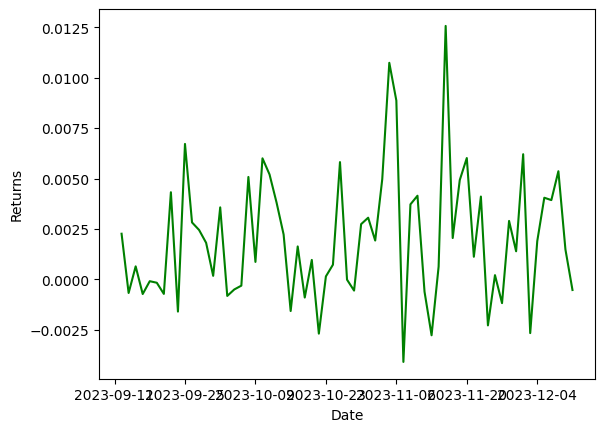

In [47]:
# prompt: pf_data veri çerçevesi kullanılıyor: pyfolio plot

from pyfolio import plotting, create_returns_tear_sheet

plotting.plot_returns(pf_data['PF_Rets'])


Start date,2023-09-11
End date,2023-12-11
Total months,3
,Backtest
Annual return,64.6%
Cumulative returns,13.9%
Annual volatility,5.1%
Sharpe ratio,9.93
Calmar ratio,158.06
Stability,0.98
Max drawdown,-0.4%


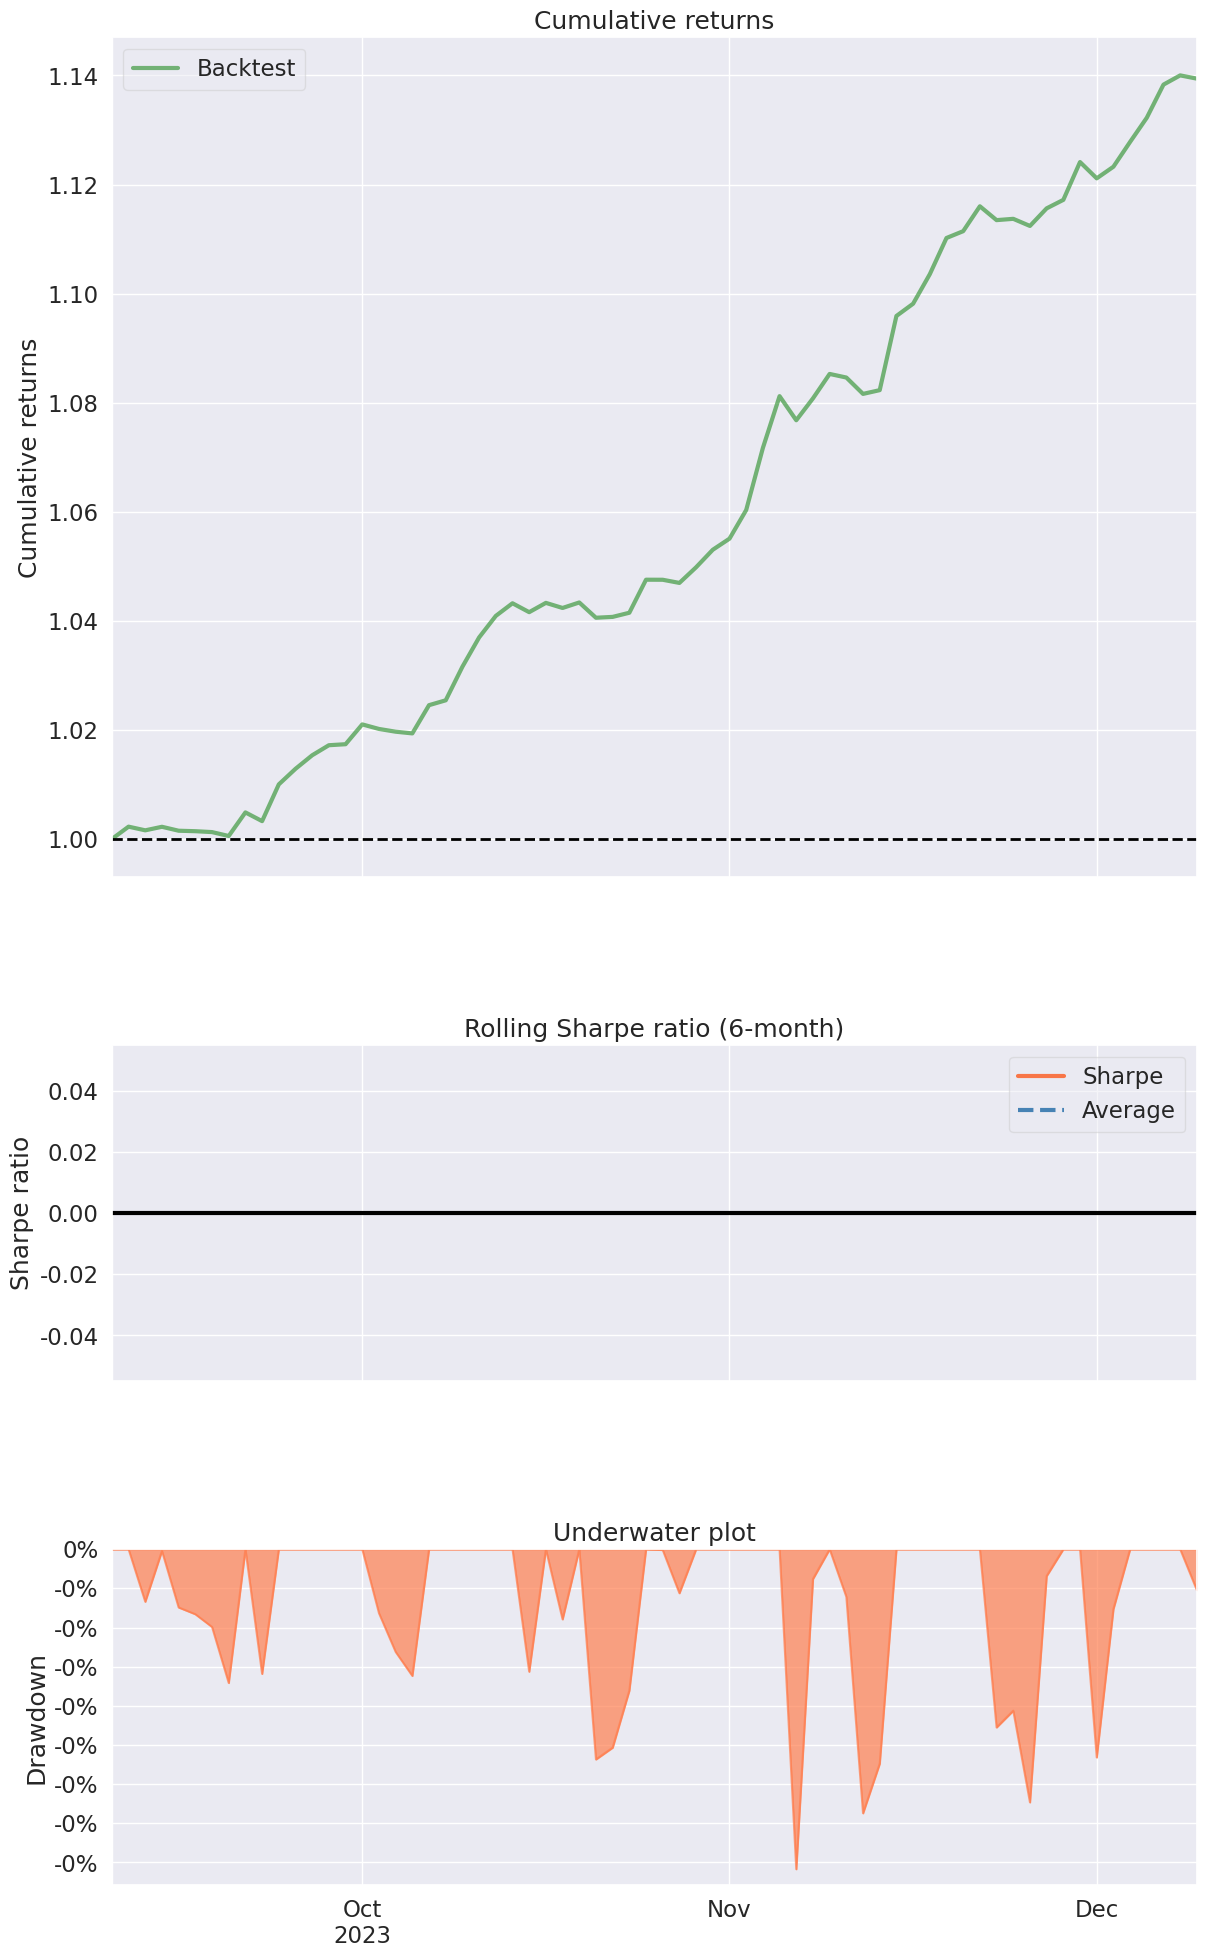

In [48]:
pf_data.index = pd.to_datetime(pf_data.index)

pyfolio.create_simple_tear_sheet(pf_data['PF_Rets'])

In [49]:
Portfolio_Amounts = np.round(CURRENT_T2*Portfolio_Weights,4)

In [50]:
InitialPrices = pf_data.iloc[0,0:]

In [51]:
show_df = pd.DataFrame({"assets":Portfolio_Assets.index.T, "%": np.round(100*Portfolio_Weights,4), "Amount": Portfolio_Amounts})
show_df = show_df.loc[(show_df["%"]>0)]
show_df = show_df.sort_values(by=['%'],ascending=False)
show_df



,assets,%,Amount
6,DZM,45.86,160510.0
2,GTY,31.68,110880.0
9,DBH,22.46,78610.0


In [52]:
last_prices = pf_data.iloc[-1,0:]
last_prices

FJB               2.279994
DVT               3.043270
GTY               2.754872
IRT               2.478279
IVY               1.731152
ZFB               2.129953
DZM              37.325589
YAY             562.747001
GPG               6.316663
DBH               0.174112
YZC               1.376470
TFF              15.068697
Portfolio    113910.266838
PF_Rets          -0.000523
Name: 2023-12-11 00:00:00, dtype: float64

In [53]:
portfolio_assets_last_prices = last_prices.loc[show_df['assets']]


In [54]:
print("Last prices are:")
print("-----------------")
print(portfolio_assets_last_prices)

show_df['buy_price'] = portfolio_assets_last_prices.values
show_df['shares_to_buy'] = np.trunc(show_df['Amount'] / portfolio_assets_last_prices.values)
show_df


Last prices are:
-----------------
DZM    37.325589
GTY     2.754872
DBH     0.174112
Name: 2023-12-11 00:00:00, dtype: float64


,assets,%,Amount,buy_price,shares_to_buy
6,DZM,45.86,160510.0,37.325589,4300.0
2,GTY,31.68,110880.0,2.754872,40248.0
9,DBH,22.46,78610.0,0.174112,451490.0


**Sharpe ratio**: The Sharpe ratio measures the excess return (the return above the risk-free rate) per unit of volatility or standard deviation. Like the Omega ratio, it measures the risk-adjusted return of a portfolio or investment but does not consider the likelihood of incurring large losses. Instead, it looks at the overall volatility, which exhibits poor efficiency as a risk denominator.


**Treynor ratio**: Both the Omega and the Treynor ratios take into account the risk of an investment. However, the Treynor ratio uses systematic risk, also known as beta, in its denominator. That means the Omega ratio captures the total risk of an investment, while the Treynor ratio only captures the risk that is not diversifiable.


**Calmar ratio**: Like the Omega, the Calmar ratio measures the risk-adjusted performance of an investment. However, it uses the maximum drawdown as the risk measure. The maximum drawdown is the maximum percentage loss from a peak to a trough, representing the worst-case scenario. That means that the Omega ratio captures the total risk of an investment, while the Calmar ratio captures the worst-case scenario.